<a href="https://colab.research.google.com/github/krdeepak39/Deep-learning-model/blob/main/Cats_Dogs_Horse_Humans_dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
path= 'drive/MyDrive/Colab Notebooks/Cat_Dog_horse_human_dataset/'

In [3]:
folder = os.listdir(path)

In [4]:
print(folder)

['cats', 'dogs', 'horses', 'humans']


In [5]:
for i in folder:
    print(i, len(os.listdir(path)))

cats 4
dogs 4
horses 4
humans 4


In [6]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [7]:
img =image.load_img(path+'cats/cat.1.jpg')

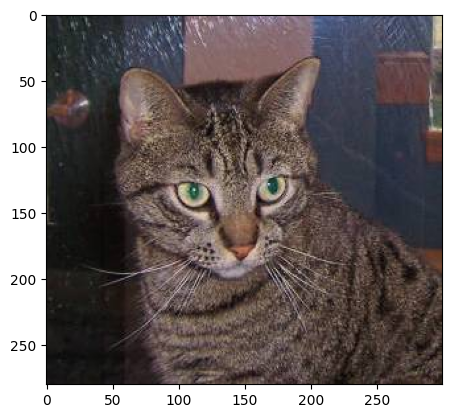

In [8]:
plt.imshow(img)

In [9]:
import numpy as np
img = np.array(img)

In [10]:
img.shape

(280, 300, 3)

In [11]:
# total_images = []
# total_images.append(img)

In [12]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
num_class = 4
img_shape = (255, 255, 3)
model = keras.Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(60, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(120, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(240, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(num_class, activation = 'softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 60)      1680      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 60)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 120)       64920     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 120)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 240)       259440    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 240)       0

In [14]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics = [keras.metrics.CategoricalAccuracy()])


In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_set = ImageDataGenerator(
                                rescale = 1/255,
                                rotation_range = 40,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                horizontal_flip = 0.2,
                                zoom_range = 0.2)
valid_set = ImageDataGenerator(rescale = 1/255)

In [17]:
train_gen = train_set.flow_from_directory(
                                        path,
                                        target_size = (255, 255),
                                        batch_size = 100,
                                        class_mode = 'categorical')

Found 734 images belonging to 4 classes.


In [18]:
val_path = 'drive/MyDrive/Colab Notebooks/Val_dataset/'

In [19]:
X, Y = next(train_gen)

In [20]:
test_gen = valid_set.flow_from_directory(
        val_path,
        target_size = (255, 255)
)

Found 84 images belonging to 4 classes.


In [21]:
test_X, test_Y = next(test_gen)

In [22]:
print(X.shape, Y)

(100, 255, 255, 3) [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0

In [23]:
print(test_X.shape, test_Y)

(32, 255, 255, 3) [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [24]:
history = model.fit_generator(train_gen, epochs = 100, validation_data = (test_gen))


<ipython-input-24-56e8c6f9ae11>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs = 100, validation_data = (test_gen))


Epoch 1/100
8/8 [==============================] - 207s 24s/step - loss: 6.5009 - categorical_accuracy: 0.2425 - val_loss: 1.3896 - val_categorical_accuracy: 0.2500
Epoch 2/100
8/8 [==============================] - 88s 11s/step - loss: 1.4721 - categorical_accuracy: 0.2807 - val_loss: 1.3652 - val_categorical_accuracy: 0.2619
Epoch 3/100
8/8 [==============================] - 94s 11s/step - loss: 1.4056 - categorical_accuracy: 0.3106 - val_loss: 1.3772 - val_categorical_accuracy: 0.2619
Epoch 4/100
8/8 [==============================] - 89s 12s/step - loss: 1.3669 - categorical_accuracy: 0.2561 - val_loss: 1.3343 - val_categorical_accuracy: 0.2857
Epoch 5/100
8/8 [==============================] - 87s 12s/step - loss: 1.3622 - categorical_accuracy: 0.3801 - val_loss: 1.3428 - val_categorical_accuracy: 0.3452
Epoch 6/100
8/8 [==============================] - 85s 10s/step - loss: 1.3098 - categorical_accuracy: 0.4292 - val_loss: 1.1431 - val_categorical_accuracy: 0.5000
Epoch 7/100
8/8

In [27]:
model.evaluate(test_gen)

3/3 [==============================] - 2s 598ms/step - loss: 0.5808 - categorical_accuracy: 0.8095


[0.5808125734329224, 0.8095238208770752]

[0. 0. 0. 1.]
(255, 255, 3)
(1, 255, 255, 3)
1/1 [==============================] - 0s 67ms/step
[[1.0148013e-05 8.1297453e-04 3.7941213e-03 9.9538273e-01]] 3


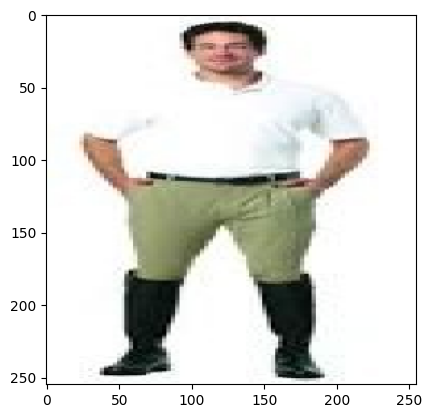

In [29]:
example = test_X[28]
print(test_Y[28])
plt.imshow(example)
print(example.shape)
example = np.expand_dims(example, 0)

print(example.shape)
pred = model.predict(example)
print(pred, np.argmax(pred))
